In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [4]:
clf = Perceptron(max_iter=1000)
clf.fit(X, y)

Perceptron()

In [5]:
clf.predict([[2, 0.5]])

array([0])

# Keras

In [6]:
import tensorflow as tf
from tensorflow import keras

2021-09-20 00:00:59.146265: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


В Keras имеется возможность загрузить датасет прямо из модуля.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_val, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_val, y_train = y_train[:5000], y_train[5000:]

In [11]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Далее составим простую модель. Как можно видеть, функция активации может задаваться как через модуль `keras.activations`, так и строкой.

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Получить сведения о созданной сети можно через метод `summary`.

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Функция `keras.utils.plot_model` позволяет построить граф сети.

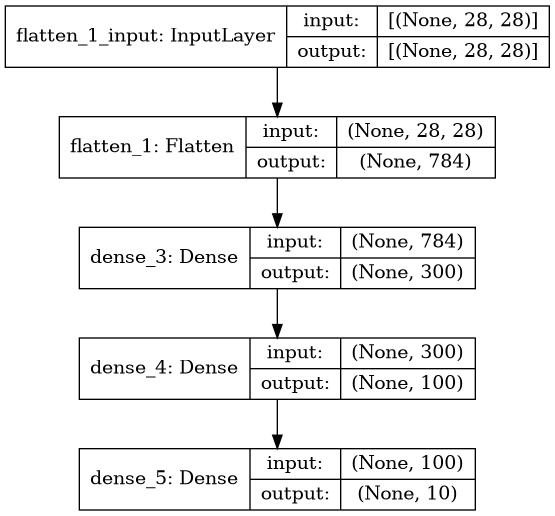

In [16]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [17]:
model.layers

Метод `get_weights` для `Dense` слоя возвращает не только веса, связанные с предыдущим слоем, но и веса, связанные с нейроном смещения.

In [18]:
model.layers[2].get_weights()

[array([[-1.02060832e-01,  1.00589879e-01, -2.60874629e-03, ...,
          6.68611452e-02,  4.03225422e-05,  7.54109547e-02],
        [ 2.59622112e-02, -1.50591210e-02, -7.56777823e-04, ...,
          5.49593791e-02, -1.01284839e-01,  4.41957489e-02],
        [ 1.17087491e-01, -9.15390998e-02, -7.23466575e-02, ...,
         -2.74334028e-02, -8.02379549e-02,  8.16009268e-02],
        ...,
        [ 4.06885669e-02, -1.07567787e-01,  6.22393563e-02, ...,
         -1.10071175e-01, -3.46610695e-02,  7.27725700e-02],
        [ 1.27558410e-03, -4.73120511e-02,  6.66608885e-02, ...,
          3.03922370e-02, -7.48967677e-02, -2.43880004e-02],
        [ 7.66754076e-02,  1.03446320e-02,  7.85665289e-02, ...,
         -7.02558979e-02,  3.03980485e-02,  7.75852054e-03]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Веса между слоями инициализируются **случайно** для того, чтобы разрушить симметрию. На самом деле мы можем самостоятельно задать способ иницилизации весов с помощью параметра `kernel_initializer` (название `kernel` - это другое название матрицы весов). При этом, заметим, что вектор весов смещения иницилизируются **нулём** - это нормально. Это значение, к слову, тоже можно изменить с помощью параметра `bias_initializer`. Всё это выполняется при создании слоя.

После создания модели, мы можем её скомпилировать, вызвав метод `compile`.

In [19]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),
          use_multiprocessing=True, workers=4)

2021-09-20 00:01:18.117454: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-20 00:01:18.133971: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400500000 Hz


Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7257 - accuracy: 0.7639 - val_loss: 0.5282 - val_accuracy: 0.8142
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4921 - accuracy: 0.8276 - val_loss: 0.4855 - val_accuracy: 0.8210
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4452 - accuracy: 0.8451 - val_loss: 0.4240 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4167 - accuracy: 0.8555 - val_loss: 0.3920 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3970 - accuracy: 0.8610 - val_loss: 0.4026 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3806 - accuracy: 0.8645 - val_loss: 0.4193 - val_accuracy: 0.8470
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3669 - accuracy: 0.8712 - val_loss: 0.3588 - val_accuracy:

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 923us/step - loss: 68.4000 - accuracy: 0.8423


[68.40003967285156, 0.8422999978065491]

In [22]:
np.argmax(model.predict(X_test[:3]), axis=1)

array([9, 2, 1])

В коде выше мы используем `sparse_categorical_crossentropy` потерю, т.к. наши целевые метки разреженные, в противном случае мы бы использовали `categorical_crossentropy`.

Если бы мы осуществляли бинарную классификацию, то использовали бы `sigmoid` функцию активации в выходном слое вместо `softmax` и `binary_crossentropy` потерю.

Вместо того, чтобы задавать валидационную выборку через `validation_data` аргумент, можно задать аргумент `validation_split`, которые просто выделит часть из тренировочного сета на валидационную выборку.

In [23]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=1, workers=4, use_multiprocessing=True)

1375/1375 [==============================] - 2s 1ms/step - loss: 0.2201 - accuracy: 0.9221 - val_loss: 0.2517 - val_accuracy: 0.9062


Теперь решим задачу регрессии

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
housing = fetch_california_housing()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [29]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=0.003))

In [30]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 [==============================] - 0s 651us/step - loss: 1.2452 - val_loss: 0.6455
Epoch 2/20
363/363 [==============================] - 0s 498us/step - loss: 0.6039 - val_loss: 0.5666
Epoch 3/20
363/363 [==============================] - 0s 511us/step - loss: 0.5715 - val_loss: 0.5251
Epoch 4/20
363/363 [==============================] - 0s 497us/step - loss: 0.5219 - val_loss: 0.5069
Epoch 5/20
363/363 [==============================] - 0s 481us/step - loss: 0.5017 - val_loss: 0.4941
Epoch 6/20
363/363 [==============================] - 0s 500us/step - loss: 0.4921 - val_loss: 0.4824
Epoch 7/20
363/363 [==============================] - 0s 495us/step - loss: 0.4821 - val_loss: 0.4744
Epoch 8/20
363/363 [==============================] - 0s 500us/step - loss: 0.4715 - val_loss: 0.4674
Epoch 9/20
363/363 [==============================] - 0s 495us/step - loss: 0.4728 - val_loss: 0.4652
Epoch 10/20
363/363 [==============================] - 0s 500us/step - loss: 0.465

In [31]:
model.evaluate(X_test, y_test)
model.predict(X_test[:3])

162/162 [==============================] - 0s 375us/step - loss: 0.4421


array([[2.1059551],
       [1.7244781],
       [2.7315488]], dtype=float32)

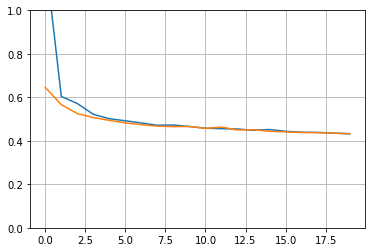

In [32]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Построение сложных моделей.

`Sequential` API очень простое в использовании, однако хоть это и типичная модель, но иногда более полезным будет применение нейронных сетей с более сложной топологией или несколькими входами и выходами. Для этой цели Keras предлагает функциональное API.

Один из примеров непоследовательной нейронной сети является **Wide & Deep** нейронная сеть. Она соединяет все или часть входных нейронов напрямую с выходным слоем.

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]                

In [35]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
363/363 [==============================] - 0s 729us/step - loss: 1.4709 - val_loss: 0.8172
Epoch 2/20
363/363 [==============================] - 0s 603us/step - loss: 0.7600 - val_loss: 0.7260
Epoch 3/20
363/363 [==============================] - 0s 583us/step - loss: 0.6926 - val_loss: 0.6680
Epoch 4/20
363/363 [==============================] - 0s 576us/step - loss: 0.6440 - val_loss: 0.6251
Epoch 5/20
363/363 [==============================] - 0s 557us/step - loss: 0.6055 - val_loss: 0.5917
Epoch 6/20
363/363 [==============================] - 0s 524us/step - loss: 0.5760 - val_loss: 0.5647
Epoch 7/20
363/363 [==============================] - 0s 554us/step - loss: 0.5519 - val_loss: 0.5432
Epoch 8/20
363/363 [==============================] - 0s 560us/step - loss: 0.5325 - val_loss: 0.5262
Epoch 9/20
363/363 [==============================] - 0s 577us/step - loss: 0.5172 - val_loss: 0.5124
Epoch 10/20
363/363 [==============================] - 0s 573us/step - loss: 0.504

Что делать, если мы хотим посылать поднаборы признаков через "широкий" путь, а другой - через "глубокий"? Тогда надо использовать несколько входов.

In [51]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [52]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Однако, когда мы будем использовать метод fit, то необходимо посылать пару матриц `(X_train_A, X_train_B)`, либо словарь: `{"wide_input": X_train_A, "deep_input": X_train_B}`. Точно так же для валидационной и тестовой выборок.

In [53]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [57]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_val_A, X_val_B), y_val))

Epoch 1/20
363/363 [==============================] - 0s 922us/step - loss: 0.4332 - val_loss: 0.4276
Epoch 2/20
363/363 [==============================] - 0s 834us/step - loss: 0.4318 - val_loss: 0.4264
Epoch 3/20
363/363 [==============================] - 0s 839us/step - loss: 0.4310 - val_loss: 0.4258
Epoch 4/20
363/363 [==============================] - 0s 848us/step - loss: 0.4298 - val_loss: 0.4249
Epoch 5/20
363/363 [==============================] - 0s 828us/step - loss: 0.4288 - val_loss: 0.4247
Epoch 6/20
363/363 [==============================] - 0s 829us/step - loss: 0.4278 - val_loss: 0.4235
Epoch 7/20
363/363 [==============================] - 0s 844us/step - loss: 0.4267 - val_loss: 0.4222
Epoch 8/20
363/363 [==============================] - 0s 820us/step - loss: 0.4256 - val_loss: 0.4217
Epoch 9/20
363/363 [==============================] - 0s 822us/step - loss: 0.4246 - val_loss: 0.4198
Epoch 10/20
363/363 [==============================] - 0s 834us/step - loss: 0.423

In [58]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 606us/step - loss: 0.4221


In [59]:
y_pred

array([[1.9570028],
       [2.026874 ],
       [2.5741   ]], dtype=float32)

Может также потребоваться использовать несколько выходов: 

- К примеру, этого требует задача: определение координаты и классификации изображения.
- Аналогично, вы можете иметь несколько независимых задач, основанные на одинаковых данных. Конечно, можно обучать нейросеть под каждую задачу, но в большинстве случаев вы получите лучшие результаты на всех задачах, обучая одну нейросеть с одним выходом под каждую задачу. К примеру, можно обучить многозадачную классификацию на изображениях лиц, используя один выход для классификации каждой эмоции (улыбка, удивление и т.д.) и второй для классификации того, имеются ли очки (к примеру).
- Можно использовать дополнительный выход для регуляризации: к примеру, можно предположить, что нижняя часть сети обучается чему-то полезному уже сама и ей не нужна остальная часть сети. Это позволяет избавиться от излишней сложности сети и переобучения.

In [74]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
concat = keras.layers.concatenate([input_A, hidden_2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden_2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [75]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [77]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
                    validation_data=((X_val_A, X_val_B), (y_val, y_val)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5269 - main_output_loss: 0.4819 - aux_output_loss: 0.9318 - val_loss: 0.5208 - val_main_output_loss: 0.4748 - val_aux_output_loss: 0.9345
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5243 - main_output_loss: 0.4800 - aux_output_loss: 0.9233 - val_loss: 0.5191 - val_main_output_loss: 0.4740 - val_aux_output_loss: 0.9255
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5218 - main_output_loss: 0.4781 - aux_output_loss: 0.9154 - val_loss: 0.5165 - val_main_output_loss: 0.4720 - val_aux_output_loss: 0.9167
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5194 - main_output_loss: 0.4762 - aux_output_loss: 0.9077 - val_loss: 0.5139 - val_main_output_loss: 0.4701 - val_aux_output_loss: 0.9084
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5170 - main_output_loss: 0.4746 - aux_output_loss: 0.8991 - val_loss

In [78]:
total_loss, main_loss, aux_loss = model.evaluate(
    (X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 982us/step - loss: 0.4979 - main_output_loss: 0.4628 - aux_output_loss: 0.8136


In [82]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [83]:
y_pred_main, y_pred_aux

(array([[2.1159754],
        [1.9336789],
        [2.5815535]], dtype=float32),
 array([[2.0514996],
        [2.1577902],
        [2.46941  ]], dtype=float32))

# Subclassing API

И Sequential API, и функциональное API являются декларативным: вы объявляете слои, которые хотите использовать, и то, как они соединяются. Это позволяет сохранять, копировать, анализировать модели. Но с другой стороны - это их же и минус. Некоторые модели используют циклы, различные формы, условные ветвления и т.п. Для таких случаев императивного стиля программирования используется Subclassing API.

Чтоб создать такой класс, нужно определить все слои прямо в конструкторе, а в методе `call` то, как они связываются.

Создадим по аналогии с предыдущим примером класс `WideAndDeepModel`.

In [85]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [86]:
model = WideAndDeepModel(30)

In [92]:
model.compile(loss='mse', loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
                   validation_data=((X_val_A, X_val_B), (y_val, y_val)))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0717 - output_1_loss: 0.7999 - output_2_loss: 3.5179 - val_loss: 0.9383 - val_output_1_loss: 0.7129 - val_output_2_loss: 2.9666
Epoch 2/20
363/363 [==============================] - 0s 978us/step - loss: 0.8561 - output_1_loss: 0.6707 - output_2_loss: 2.5245 - val_loss: 0.8060 - val_output_1_loss: 0.6457 - val_output_2_loss: 2.2486
Epoch 3/20
363/363 [==============================] - 0s 976us/step - loss: 0.7598 - output_1_loss: 0.6237 - output_2_loss: 1.9846 - val_loss: 0.7338 - val_output_1_loss: 0.6114 - val_output_2_loss: 1.8355
Epoch 4/20
363/363 [==============================] - 0s 931us/step - loss: 0.7055 - output_1_loss: 0.5966 - output_2_loss: 1.6862 - val_loss: 0.6887 - val_output_1_loss: 0.5858 - val_output_2_loss: 1.6143
Epoch 5/20
363/363 [==============================] - 0s 920us/step - loss: 0.6708 - output_1_loss: 0.5762 - output_2_loss: 1.5225 - val_loss: 0.6582 - val_output_1_loss: 0.5657 